# Telecom Churn

## Importing The Required Libraries

In [143]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

import warnings
warnings.filterwarnings('ignore')

## The Dataset

### Reading The Dataset

In [144]:
data = pd.read_csv("telecom_churn_data.csv")

In [145]:
# Changing default display options for better visibility of data
pd.options.display.max_columns = 226
pd.options.display.max_rows= 226

In [146]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [147]:
data.shape

(99999, 226)

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [149]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.

## Data Cleaning

In [150]:
# Rename few Columns
data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [151]:
# Get the index of null values for both columns and verify if both matches 

res6 = data.total_rech_data_6[data.total_rech_data_6.isna()].index != data.av_rech_amt_data_6[data.av_rech_amt_data_6.isna()].index
print('June :', res6.any())

res7 = data.total_rech_data_7[data.total_rech_data_7.isna()].index != data.av_rech_amt_data_7[data.av_rech_amt_data_7.isna()].index
print('July :', res7.any())

res8 = data.total_rech_data_8[data.total_rech_data_8.isna()].index != data.av_rech_amt_data_8[data.av_rech_amt_data_8.isna()].index
print('Aug :', res8.any())

June : False
July : False
Aug : False


In [152]:
# finding the count of NULL values in these columns
print(data.loc[:, [col for col in data.columns if 'total_rech_data_' in col]].isnull().sum())
print(data.loc[:, [col for col in data.columns if 'av_rech_amt_data_' in col]].isnull().sum())

total_rech_data_6    74846
total_rech_data_7    74428
total_rech_data_8    73660
total_rech_data_9    74077
dtype: int64
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
av_rech_amt_data_9    74077
dtype: int64


In [153]:
# Impute values with 0 as these columns are in use for high value customers filter
data.total_rech_data_6.fillna(0, inplace=True)
data.total_rech_data_7.fillna(0, inplace=True)
data.total_rech_data_8.fillna(0, inplace=True)

data.av_rech_amt_data_6.fillna(0, inplace=True)
data.av_rech_amt_data_7.fillna(0, inplace=True)
data.av_rech_amt_data_8.fillna(0, inplace=True)

In [154]:
# Check if there are NULL values in total_rech_amnt monthly columns
print(data['total_rech_amt_6'].isna().sum())
print(data['total_rech_amt_7'].isna().sum())
print(data['total_rech_amt_8'].isna().sum())

0
0
0


In [155]:
# Check the information of total recharge amount columns
data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].describe(percentiles=[.25,.5,.75,.90,.95,.99,1])

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
count,99999.00,99999.00,99999.00
mean,327.51,322.96,324.16
std,398.02,408.11,416.54
min,0.00,0.00,0.00
25%,109.00,100.00,90.00
50%,230.00,220.00,225.00
75%,437.50,428.00,434.50
90%,732.00,731.00,736.00
95%,994.00,993.00,996.00
99%,1683.02,1728.00,1721.00


In [156]:
# Total data recharge amount
data['total_data_rech_amt_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_rech_amt_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']
data['total_data_rech_amt_8'] = data['total_rech_data_8'] * data['av_rech_amt_data_8']

# Total amount from data recharge and ic/og calls
data['call_data_amt_6'] = data[['total_rech_amt_6','total_data_rech_amt_6']].sum(axis=1)
data['call_data_amt_7'] = data[['total_rech_amt_7','total_data_rech_amt_7']].sum(axis=1)
data['call_data_amt_8'] = data[['total_rech_amt_8','total_data_rech_amt_8']].sum(axis=1)

# Average of amount for first 2 months
data['good_phase_amt_avg'] = data[['call_data_amt_6','call_data_amt_7']].mean(axis=1)
data['action_phase_amt_avg'] = data[['call_data_amt_8']]

### Filtering the High Value Customers

In [157]:
# Finding HVC for the given dataset i.e., 70 percentile of good_phase_amt_avg
df_hvc = data[(data['good_phase_amt_avg'] >= data['good_phase_amt_avg'].quantile(0.7))]

In [158]:
# As mentioned in problem statement after filtering out High value customer we are approximately getting 29.9k rows of data.
df_hvc.shape

(30001, 234)

In [159]:
df_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 234 entries, mobile_number to action_phase_amt_avg
dtypes: float64(187), int64(35), object(12)
memory usage: 53.8+ MB


### Tagging the churners

In [160]:
# Finding churn and not 
df_hvc['churn'] = np.where(
                            ((df_hvc['total_ic_mou_9'] == 0.00) & (df_hvc['total_og_mou_9'] == 0.00))
                            & ((df_hvc['vol_2g_mb_9'] == 0.00) & (df_hvc['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           )

print(df_hvc['churn'].value_counts())
print(df_hvc['churn'].value_counts()/df_hvc.shape[0])

0    27560
1     2441
Name: churn, dtype: int64
0   0.92
1   0.08
Name: churn, dtype: float64


In [161]:
df_hvc[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head(20)

,churn,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,1,0.00,0.00,0.00,0.00
7,1,0.00,0.00,0.00,0.00
8,0,34.91,142.18,0.00,0.00
21,0,252.61,1031.53,0.00,0.00
23,0,127.48,127.63,13.93,314.74
33,0,114.16,1.70,30.92,5588.11
38,0,114.09,708.04,0.00,0.00
41,0,165.84,89.13,0.00,0.00
48,0,894.81,2319.01,0.00,0.00
53,0,680.61,503.06,0.82,0.00


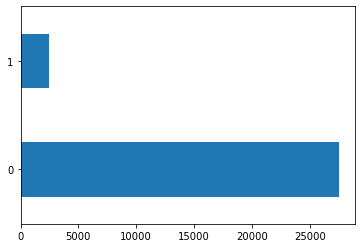

In [162]:
# Check the unique values count in churn column
df_hvc.churn.value_counts()
df_hvc['churn'].value_counts().plot(kind='barh')

In [163]:
# find the columns which has name ends with _9 attribute
month_9_columns = df_hvc.columns[df_hvc.columns.str.endswith(pat = '_9')]
print("The columns names ends with _9 are given below...")
month_9_columns

The columns names ends with _9 are given below...


Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [164]:
# Dropping columns which have 9 in them
df_hvc.drop(list(month_9_columns),axis=1,inplace=True)

In [165]:
# Check Missing value percentage for each columns
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((df_hvc.isnull().sum()/len(df_hvc))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
133,count_rech_3g_8,46.83
148,arpu_2g_8,46.83
121,date_of_last_rech_data_8,46.83
130,count_rech_2g_8,46.83
151,night_pck_user_8,46.83
127,max_rech_data_8,46.83
166,fb_user_8,46.83
145,arpu_3g_8,46.83
149,night_pck_user_6,44.15
143,arpu_3g_6,44.15


In [166]:
# Find all such columns having unique values less than 2
count = 0
cols = []
for col in df_hvc.columns:
    if df_hvc[col].nunique() < 2 or df_hvc[col].nunique() == df_hvc.shape[0]:
        count+=1
        print(count, " ColName = ", col,
              ",\t UniqueValues = ", df_hvc[col].unique(),
              ",\t Dtype = ", df_hvc[col].dtype)
        cols.append(col)

1  ColName =  mobile_number ,	 UniqueValues =  [7000842753 7000701601 7001524846 ... 7001729035 7002111859 7000498689] ,	 Dtype =  int64
2  ColName =  circle_id ,	 UniqueValues =  [109] ,	 Dtype =  int64
3  ColName =  loc_og_t2o_mou ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
4  ColName =  std_og_t2o_mou ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
5  ColName =  loc_ic_t2o_mou ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
6  ColName =  last_date_of_month_6 ,	 UniqueValues =  ['6/30/2014'] ,	 Dtype =  object
7  ColName =  last_date_of_month_7 ,	 UniqueValues =  ['7/31/2014' nan] ,	 Dtype =  object
8  ColName =  last_date_of_month_8 ,	 UniqueValues =  ['8/31/2014' nan] ,	 Dtype =  object
9  ColName =  std_og_t2c_mou_6 ,	 UniqueValues =  [nan  0.] ,	 Dtype =  float64
10  ColName =  std_og_t2c_mou_7 ,	 UniqueValues =  [nan  0.] ,	 Dtype =  float64
11  ColName =  std_og_t2c_mou_8 ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
12  ColName =  std_ic_t2o_mou_6 ,	 UniqueValues =  

In [167]:
# Dropping columns which have unique value less than 2 
df_hvc.drop(list(cols),axis=1,inplace=True)

In [168]:
df_hvc.shape

(30001, 166)

In [169]:
# Calculating all such columns which have null values
na_percent = round(df_hvc.isnull().sum() / len(df_hvc.index) * 100, 2)
na_percent = na_percent[na_percent > 0]
print("Number of columns which has atleast one null value is", na_percent.count())
na_percent.sort_values(ascending=False)

Number of columns which has atleast one null value is 108


fb_user_8                  46.83
arpu_2g_8                  46.83
count_rech_2g_8            46.83
count_rech_3g_8            46.83
date_of_last_rech_data_8   46.83
max_rech_data_8            46.83
arpu_3g_8                  46.83
night_pck_user_8           46.83
date_of_last_rech_data_6   44.15
arpu_2g_6                  44.15
night_pck_user_6           44.15
arpu_3g_6                  44.15
max_rech_data_6            44.15
count_rech_3g_6            44.15
fb_user_6                  44.15
count_rech_2g_6            44.15
fb_user_7                  43.15
max_rech_data_7            43.15
date_of_last_rech_data_7   43.15
count_rech_2g_7            43.15
arpu_3g_7                  43.15
arpu_2g_7                  43.15
night_pck_user_7           43.15
count_rech_3g_7            43.15
std_og_t2t_mou_8            3.91
loc_ic_t2f_mou_8            3.91
loc_ic_t2t_mou_8            3.91
og_others_8                 3.91
spl_og_mou_8                3.91
isd_og_mou_8                3.91
std_og_mou

In [170]:
# Finding all minutes of usage columns 
mou_columns = df_hvc.columns[df_hvc.columns.str.contains(pat = '_mou')]
print("MOU columns\n", mou_columns.values)

MOU columns
 ['onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'offnet_mou_6' 'offnet_mou_7'
 'offnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'loc_og_t2t_mou_6'
 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_6'
 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2c_mou_6'
 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'
 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8' 'std_og_mou_6'
 'std_og_mou_7' 'std_og_mou_8' 'isd_og_mou_6' 'isd_og_mou_7'
 'isd_og_mou_8' 'spl_og_mou_6' 'spl_og_mou_7' 'spl_og_mou_8'
 'total_og_mou_6' 'total_og_mou_7' 'total_og_mou_8' 'loc_ic_t2t_mou_6'
 'loc_ic_t2t_mou_7' 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6'
 'loc_ic_t2m_mou_7' 'loc_ic_t2m_mou_8' 'loc_ic_t2f_mou_6'
 'loc_ic_t2f_mou_7' 'loc_i

In [171]:
# Filling null with 0 since null means no minutes of usage 
df_hvc[mou_columns] = df_hvc[mou_columns].fillna(0)

In [172]:
# Finding the columns which have other in column name
others_cols = df_hvc.columns[df_hvc.columns.str.contains(pat = '_others_')]
df_hvc[others_cols].head()

,og_others_6,og_others_7,og_others_8,ic_others_6,ic_others_7,ic_others_8
0,nan,nan,0.00,nan,nan,0.00
7,0.00,0.00,0.00,15.74,15.19,15.14
8,0.00,0.00,0.00,0.00,0.00,0.00
21,0.00,0.00,0.00,0.00,0.00,0.00
23,0.00,0.00,0.00,0.00,5.35,13.06


In [173]:
# Filling null with 0 since null means no minutes of usage 
df_hvc[others_cols] = df_hvc[others_cols].fillna(0)

In [174]:
# Calculating the Percentage of null values 
na_col = (df_hvc.isna().sum()/df_hvc.shape[0])*100
na_col=na_col[na_col.values>0]
na_col

date_of_last_rech_6         0.24
date_of_last_rech_7         0.33
date_of_last_rech_8         1.94
date_of_last_rech_data_6   44.15
date_of_last_rech_data_7   43.15
date_of_last_rech_data_8   46.83
max_rech_data_6            44.15
max_rech_data_7            43.15
max_rech_data_8            46.83
count_rech_2g_6            44.15
count_rech_2g_7            43.15
count_rech_2g_8            46.83
count_rech_3g_6            44.15
count_rech_3g_7            43.15
count_rech_3g_8            46.83
arpu_3g_6                  44.15
arpu_3g_7                  43.15
arpu_3g_8                  46.83
arpu_2g_6                  44.15
arpu_2g_7                  43.15
arpu_2g_8                  46.83
night_pck_user_6           44.15
night_pck_user_7           43.15
night_pck_user_8           46.83
fb_user_6                  44.15
fb_user_7                  43.15
fb_user_8                  46.83
dtype: float64

In [175]:
# Dropping all columns which have null percent more than 40 and also all other date columns from the dataframe
df_hvc.drop(list(na_col.index),axis=1,inplace=True)

In [176]:
na_col = (df_hvc.isna().sum()/df_hvc.shape[0])*100
na_col=na_col[na_col.values>0]
na_col

Series([], dtype: float64)

We can see their are no other null columns in the data Frame

## Deriving Features 

### Combining The 2g & 3g Volume For Each Month

In [177]:
df_hvc["vol_data_mb_6"] = df_hvc[["vol_2g_mb_6", "vol_3g_mb_6"]].sum(axis=1)
df_hvc["vol_data_mb_7"] = df_hvc[["vol_2g_mb_7", "vol_3g_mb_7"]].sum(axis=1)
df_hvc["vol_data_mb_8"] = df_hvc[["vol_2g_mb_8", "vol_3g_mb_8"]].sum(axis=1)

### Combining The 2g & 3g Monthly Packs

In [178]:
df_hvc["data_monthly_6"] = df_hvc[["monthly_2g_6", "monthly_3g_6"]].sum(axis=1)
df_hvc["data_monthly_7"] = df_hvc[["monthly_2g_7", "monthly_3g_7"]].sum(axis=1)
df_hvc["data_monthly_8"] = df_hvc[["monthly_2g_8", "monthly_3g_8"]].sum(axis=1)

### Combining The 2g & 3g Sachets

In [179]:
df_hvc["data_sachet_6"] = df_hvc[["sachet_2g_6", "sachet_3g_6"]].sum(axis=1)
df_hvc["data_sachet_7"] = df_hvc[["sachet_2g_7", "sachet_3g_7"]].sum(axis=1)
df_hvc["data_sachet_8"] = df_hvc[["sachet_2g_8", "sachet_3g_8"]].sum(axis=1)

## Exploratory Data Analysis

### Outgoing Minutes Of Usage Vs Churn

<Figure size 432x288 with 0 Axes>

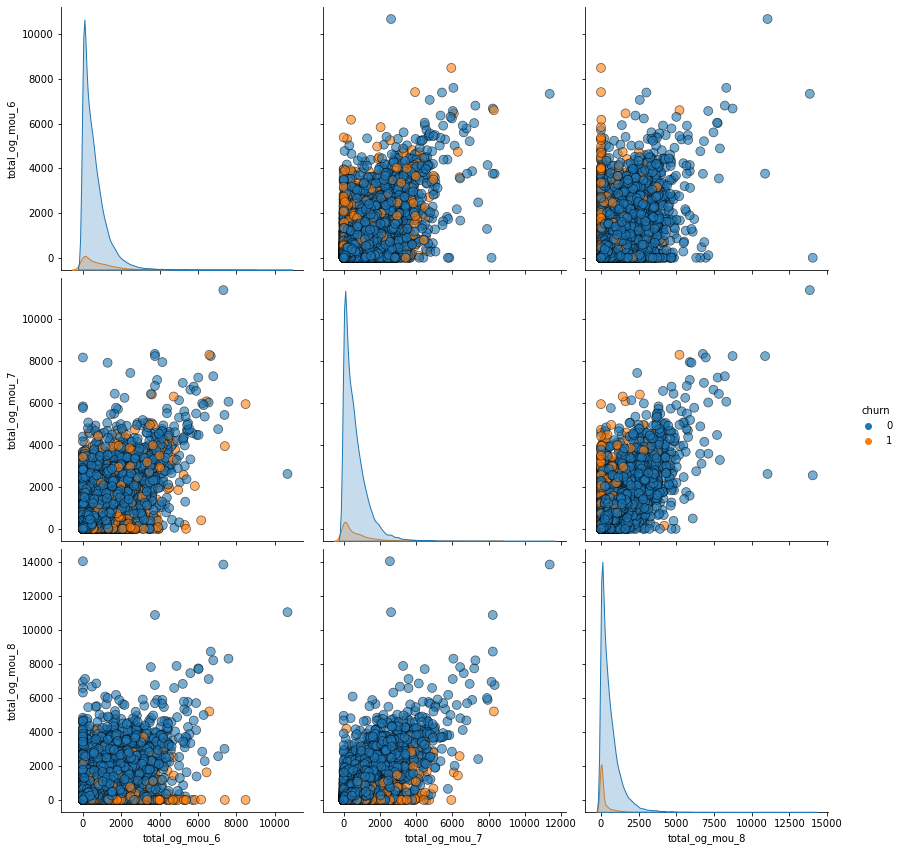

In [180]:
plt.figure()
ax = sns.pairplot(df_hvc[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']], hue = 'churn', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

<Figure size 432x288 with 0 Axes>

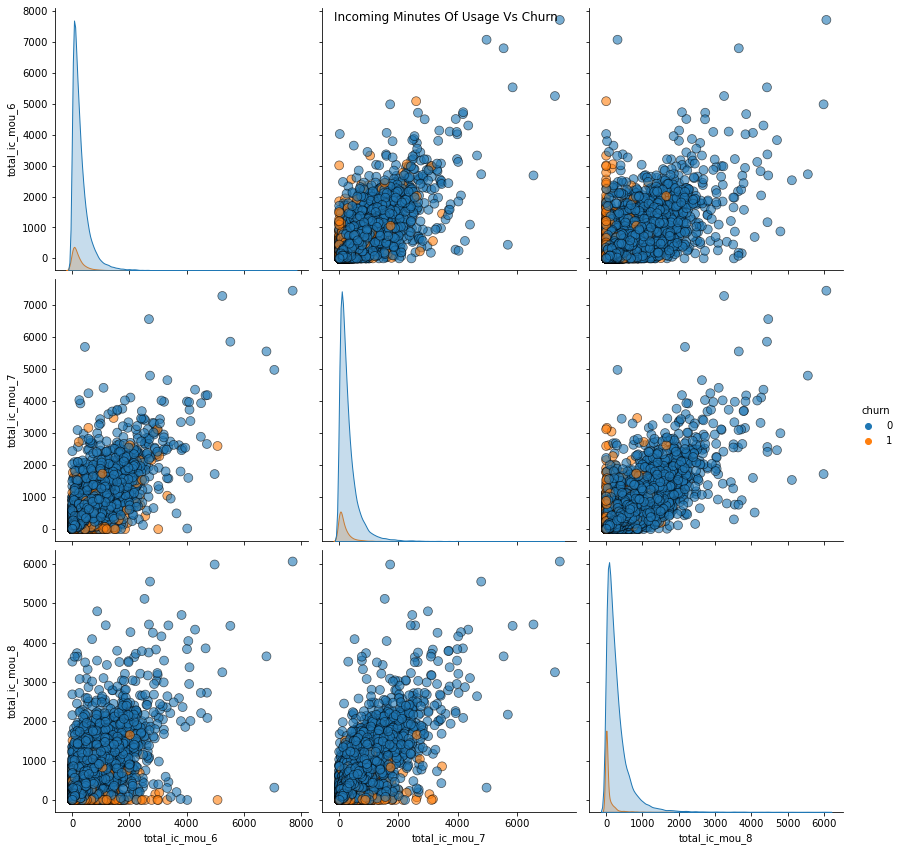

In [181]:
plt.figure()
ax = sns.pairplot(df_hvc[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']], hue = 'churn', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
ax.fig.suptitle("Incoming Minutes Of Usage Vs Churn")
plt.show()

### Average Revenue Per User Vs Churn

<Figure size 432x288 with 0 Axes>

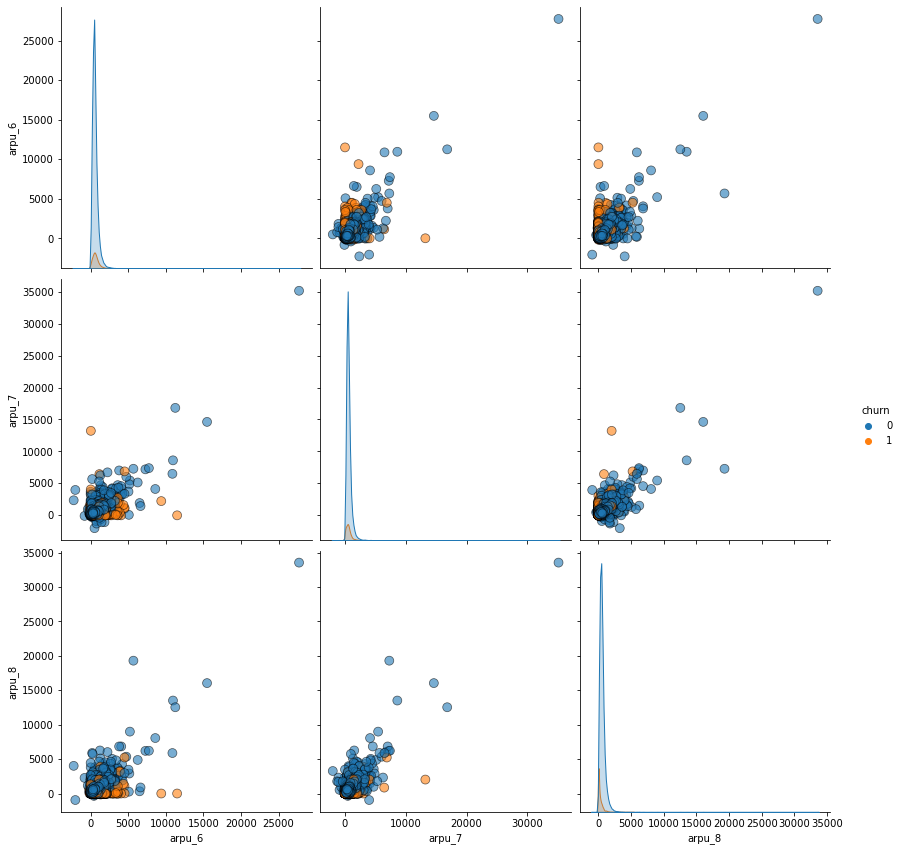

In [182]:
plt.figure()
ax = sns.pairplot(df_hvc, 
             vars = ['arpu_6', 'arpu_7', 'arpu_8'], 
             hue = 'churn', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);
plt.show()

### Number of Data Recharges in June

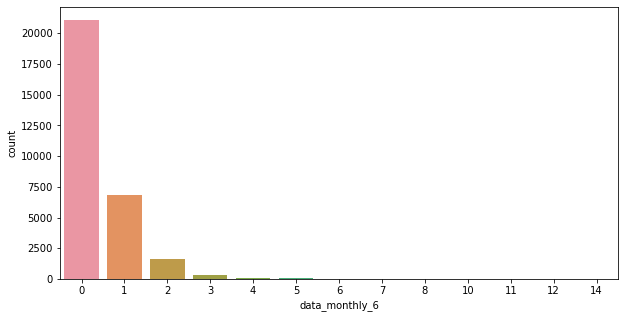

In [183]:
plt.figure(figsize = (10,5))
sns.countplot(x="data_monthly_6", data=df_hvc)
plt.show()

### Number of Data Recharges in July

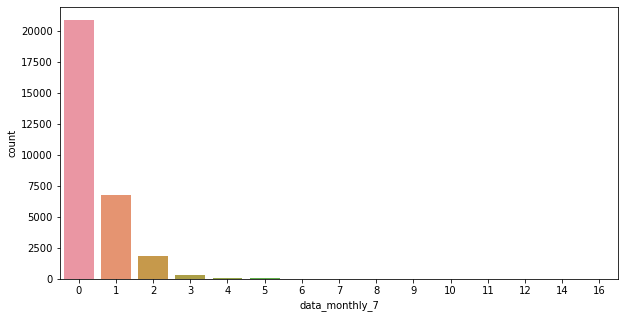

In [184]:
plt.figure(figsize = (10,5))
sns.countplot(x="data_monthly_7", data=df_hvc)
plt.show()

### Number of Data Recharges in August

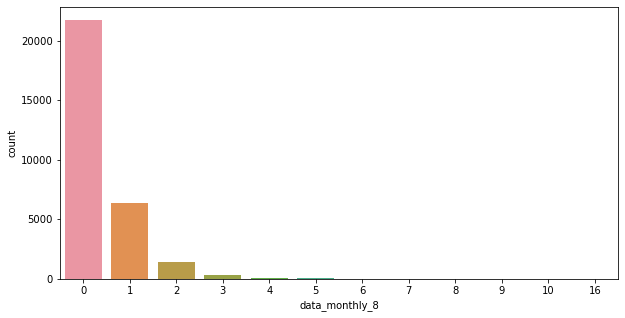

In [185]:
plt.figure(figsize = (10,5))
sns.countplot(x="data_monthly_8", data=df_hvc)
plt.show()

### Max_rech_data

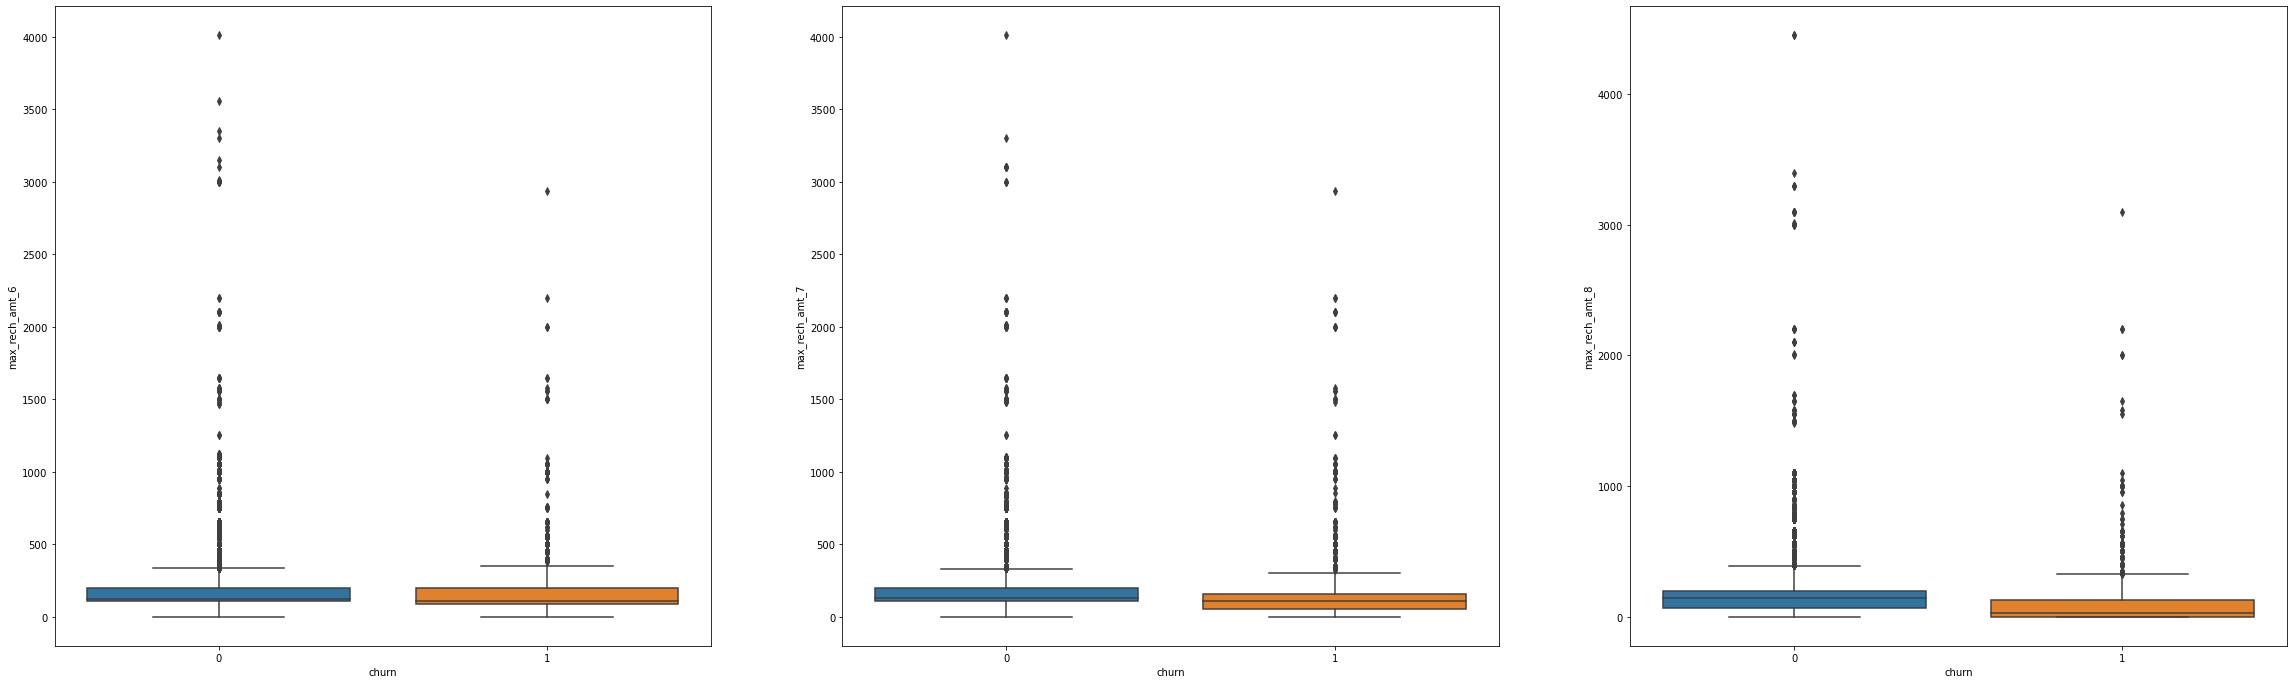

In [186]:
plt.subplots(figsize=(40,40))

plt.subplot(3,3,1)
sns.boxplot(x='churn', y='max_rech_amt_6', data = df_hvc)

plt.subplot(3,3,2)
sns.boxplot(x='churn', y='max_rech_amt_7', data = df_hvc)

plt.subplot(3,3,3)
sns.boxplot(x='churn', y='max_rech_amt_8', data = df_hvc)

plt.show()

### Age on Network vs Churn

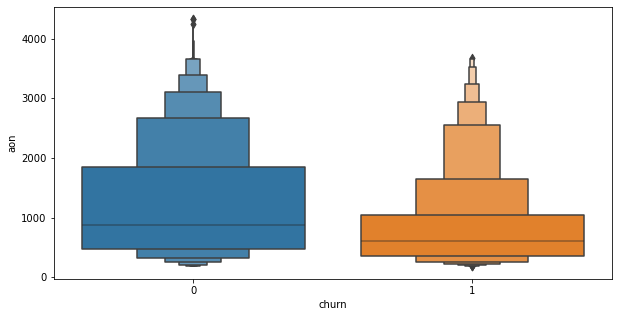

In [187]:
plt.figure(figsize=(10,5))
sns.boxenplot(x='churn', y='aon', data = df_hvc)
plt.show()

### Correlation between the Predictor Variables

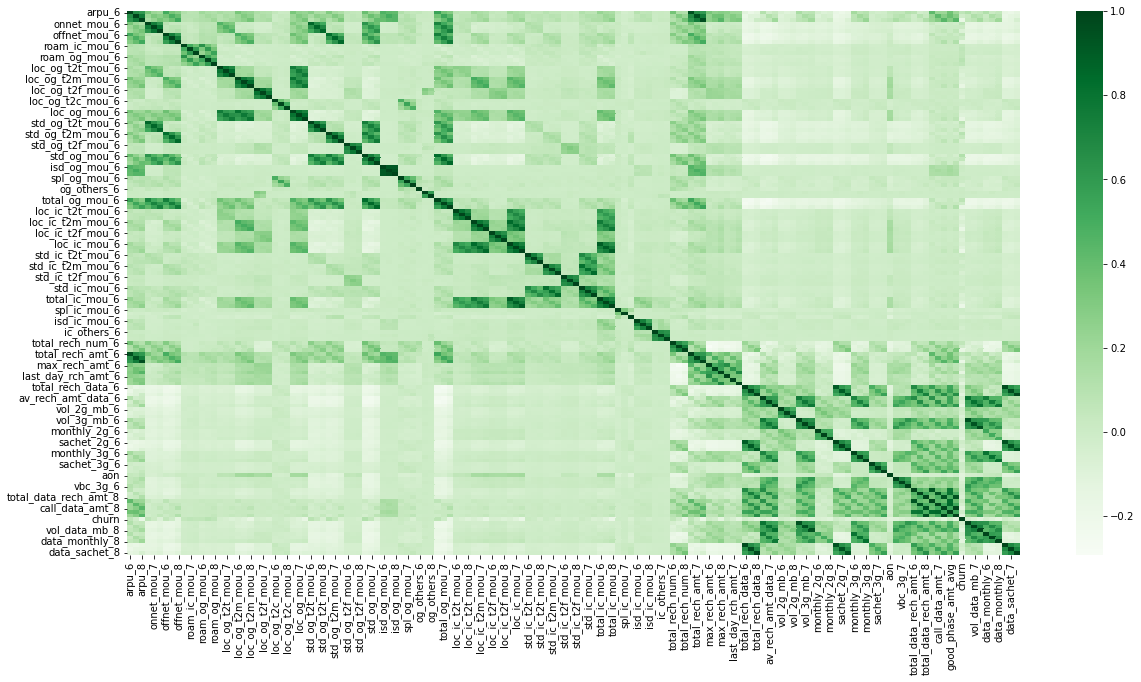

In [188]:
# Find correlation between columns
plt.figure(figsize=(20,10))
sns.heatmap(df_hvc.corr(), cmap="Greens")
plt.show()

## Outliers treatment 

In [189]:
# Removing the outliers in all the numerical columns except the Traget variable

def drop_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.99)
        IQR = Q3-Q1
        df =  df[(df[col] >= (Q1-(1.5*IQR))) & (df[col] <= (Q3+(1.5*IQR)))] 
    return df   

df_hvc = drop_outliers(df_hvc)

In [190]:
df_hvc.describe([.25,.5,.75,.90,.95,.99,1])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,call_data_amt_6,call_data_amt_7,call_data_amt_8,good_phase_amt_avg,action_phase_amt_avg,churn,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,data_monthly_6,data_monthly_7,data_monthly_8,data_sachet_6,data_sachet_7,data_sachet_8
count,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00,26831.00
mean,525.14,522.51,468.88,249.68,253.53,219.34,358.84,361.21,316.47,12.76,8.86,8.89,21.85,15.23,14.51,75.10,74.45,67.58,157.88,157.68,146.10,5.41,5.43,4.99,1.37,1.52,1.45,238.40,237.57,218.69,165.83,172.94,146.01,176.97,183.74,151.86,1.09,1.00,0.89,343.89,357.69,298.76,0.30,0.25,0.13,5.01,6.02,5.47,0.59,0.00,0.00,588.21,601.54,523.06,56.98,56.69,53.09,142.90,143.60,138.79,13.19,13.54,12.35,213.09,213.84,204.23,10.44,10.70,9.66,23.20,23.69,21.45,1.66,1.68,1.53,35.30,36.07,32.64,254.3

We can see their are no outliers peresent in the Dataframe. 

## Data Preparation

### Spliting The Dataset Into Train & Test

In [191]:
y = df_hvc["churn"]
X = df_hvc.drop("churn", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

### Handling Class Imbalance

In [192]:
y_train.value_counts()

0    18502
1     1621
Name: churn, dtype: int64

In [193]:
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

In [194]:
y_train.value_counts()

1    18502
0    18502
Name: churn, dtype: int64

### Scaling The Values

In [195]:
cols = X_train.columns.tolist()

In [196]:
mm = MinMaxScaler()

X_train = pd.DataFrame(mm.fit_transform(X_train), columns=cols)
X_test = pd.DataFrame(mm.transform(X_test), columns=cols)

## Model Building

In [197]:
# Method to plot the confusion matrix 

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, cmap="Greens", annot=True, fmt="d")
    plt.show()
    
def show_scores(y_true, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy is : {}".format(acc))
    recall = recall_score(y_test, y_pred)
    print("Recall is : {}".format(recall))
    
def show_metrics(y_true, y_pred):
    plot_confusion_matrix(y_true, y_pred)
    show_scores(y_true, y_pred)

### Interpretable Model

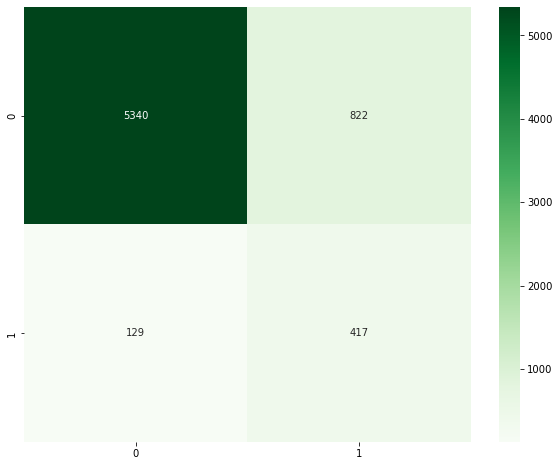

Accuracy is : 0.8582289803220036
Recall is : 0.7637362637362637


In [198]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

show_metrics(y_test, y_pred)

In [199]:
imp_df = pd.DataFrame({"feature": X_train.columns, "importance":lr.coef_[0]})
imp_df.set_index("feature", inplace=True)
imp_df.sort_values(by="importance", ascending=False, inplace=True)

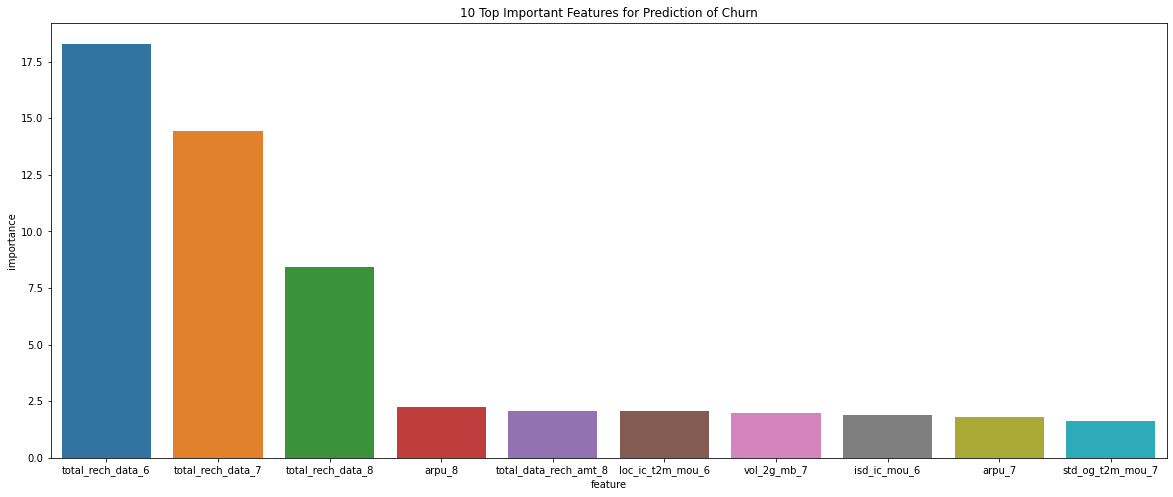

In [200]:
top_10 = imp_df.head(10)

plt.figure(figsize=(20,8))
plt.title("10 Top Important Features for Prediction of Churn")
sns.barplot(x=top_10.index, y=top_10["importance"])
plt.show()

We see that the 10 most important features for predicting Churn are:

1. total_rech_data_6
2. total_rech_data_7
3. total_rech_data_8
4. total_data_rech_amt_8
5. action_phase_amt_avg
6. call_data_amt_8
7. roam_og_mou_8
8. std_og_t2f_mou_6
9. av_rech_amt_data_7
10. arpu_7

#### Business Recommendations

1. Data is an indicator of churn. We could give some offers to the customers who are using more data to prevent them from churning.

2. Roaming outgoing is also an indicator of churn. We could give some offers to the customers who are more frequently out of state to prevent them from churning.

3. Based on average revenue we can give some offers to the customers to prevent them from churning.

4. Action phase is an indicator, when we see customers recharge amount going down from the good phase we can give them some offers to keep them from churning.

5. We see people using STD outgoing calls, so we can give an offer for STD calls

6. We can see people who have recharged in good phase have not recharged in action phase, so we can see the other activities and give them offers to prevent them from churning.

### Predictive Models

We will use Recall as the metric for our predictive models because we do not want to miss out any future churner.

#### Applying Principal Component Analysis

In [201]:
pca = PCA(n_components=None)
pca.fit(X_train,y_train)
np.round(np.cumsum((pca.explained_variance_ratio_,)),2)

array([0.15, 0.26, 0.34, 0.4 , 0.44, 0.48, 0.52, 0.54, 0.57, 0.59, 0.62,
       0.64, 0.66, 0.67, 0.69, 0.7 , 0.71, 0.73, 0.74, 0.75, 0.76, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.81, 0.82, 0.83, 0.83, 0.84, 0.84,
       0.85, 0.85, 0.86, 0.86, 0.87, 0.87, 0.88, 0.88, 0.89, 0.89, 0.89,
       0.9 , 0.9 , 0.91, 0.91, 0.91, 0.92, 0.92, 0.92, 0.92, 0.93, 0.93,
       0.93, 0.94, 0.94, 0.94, 0.94, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96,
       0.96, 0.96, 0.96, 0.96, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.98,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99,
       0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  ])

We see that we get 90% explained variance ratio by using 45 components. So we will apply PCA on our dataset using 45 components

In [202]:
pca = PCA(n_components=45)
X_train = pca.fit_transform(X_train,y_train)
X_test = pca.transform(X_test)

#### K Neighbours Classifier

In [203]:
params = dict(
    n_neighbors = [2,4,6,8,10],
    metric = ['mahnhattan','chebyshev','euclidean','minkowski']
)
knc = KNeighborsClassifier()
clf = GridSearchCV(knc,params,scoring='recall',cv=5,n_jobs=-1)
gsc = clf.fit(X_train,y_train)
gsc.best_params_

{'metric': 'euclidean', 'n_neighbors': 4}

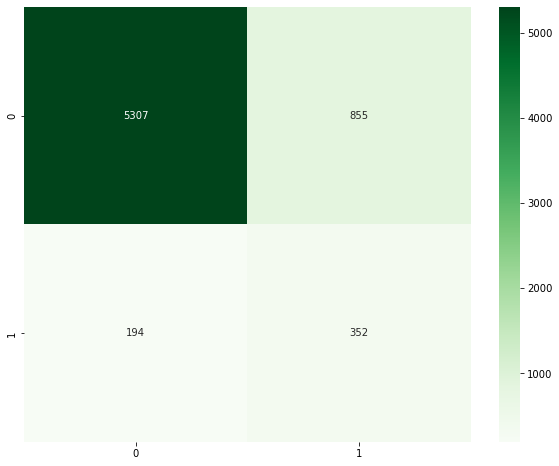

Accuracy is : 0.8436195587358378
Recall is : 0.6446886446886447


In [204]:
knc = KNeighborsClassifier(metric="euclidean", n_neighbors=4)
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)

show_metrics(y_test, y_pred)

#### Logistic Regression

In [205]:
params = dict(
    C = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
)
lr = LogisticRegression()
clf = GridSearchCV(lr,params,scoring='recall',cv=5,n_jobs=-1)
gsc = clf.fit(X_train,y_train)
gsc.best_params_

{'C': 1}

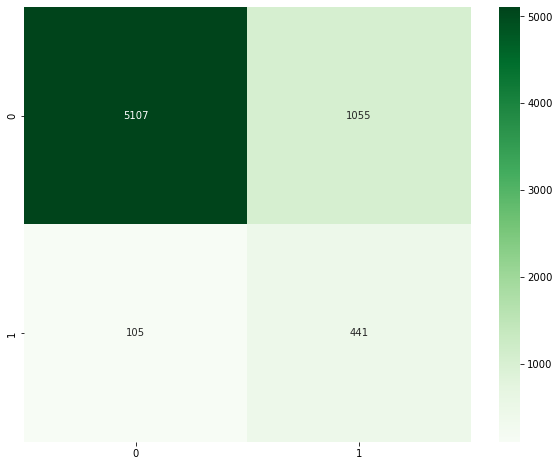

Accuracy is : 0.827072152653548
Recall is : 0.8076923076923077


In [211]:
lr = LogisticRegression(C=1)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

show_metrics(y_test, y_pred)

#### Decision Tree Classifier

In [207]:
params = dict(
    max_depth = [5,10,15,20,25],
    criterion = ["gini", "entropy"]
)
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc,params,scoring='recall',cv=5,n_jobs=-1)
gsc = clf.fit(X_train,y_train)
gsc.best_params_

{'criterion': 'gini', 'max_depth': 15}

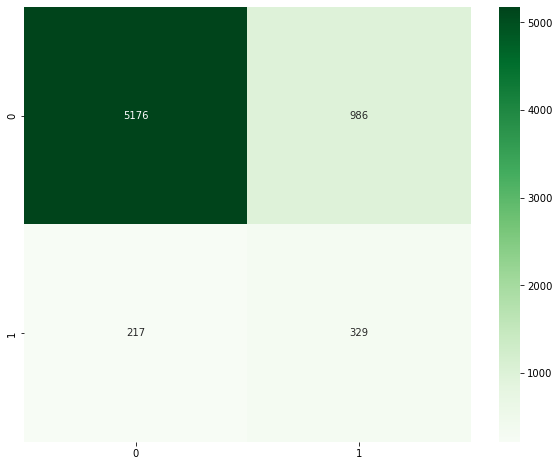

Accuracy is : 0.8206618962432916
Recall is : 0.6025641025641025


In [208]:
dtc = DecisionTreeClassifier(criterion="gini", max_depth=15)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

show_metrics(y_test, y_pred)

#### Random Forest Classifier

In [209]:
params = dict(
    n_estimators = [50,100,150,200,250],
    max_depth = [5,10,15,20,25],
    criterion = ["gini", "entropy"]
)
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc,params,scoring='recall',cv=5, n_jobs=-1)
gsc = clf.fit(X_train,y_train)
gsc.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 200}

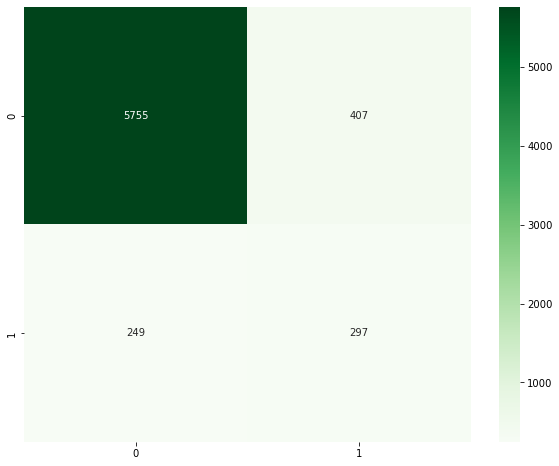

Accuracy is : 0.902206320810972
Recall is : 0.5439560439560439


In [212]:
rfc = RandomForestClassifier(criterion="entropy", max_depth=20, n_estimators=200)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

show_metrics(y_test, y_pred)

## Conclusion

We can see that Logistic Regression Model has the highest recall metric. So we will use it as our model to predict the churners.